In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("titanic.csv")
df1.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df = df1[df1['age'].notna()]
df.isna().sum()
df.shape

(1046, 14)

In [4]:
import numpy as np
df['age_group'] = pd.cut(df['age'],bins = np.arange(0,90,10))
df.head(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_19416\4246796909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'],bins = np.arange(0,90,10))


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","(20, 30]"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]"


In [5]:
grouped = df.groupby("age_group")['fare'].mean().reset_index()
grouped

C:\Users\HP\AppData\Local\Temp\ipykernel_19416\3067633111.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("age_group")['fare'].mean().reset_index()


,age_group,fare
0,"(0, 10]",29.436044
1,"(10, 20]",28.807050
2,"(20, 30]",28.159013
3,"(30, 40]",42.701507
4,"(40, 50]",47.254231
5,"(50, 60]",61.943347
6,"(60, 70]",66.131250
7,"(70, 80]",34.755567


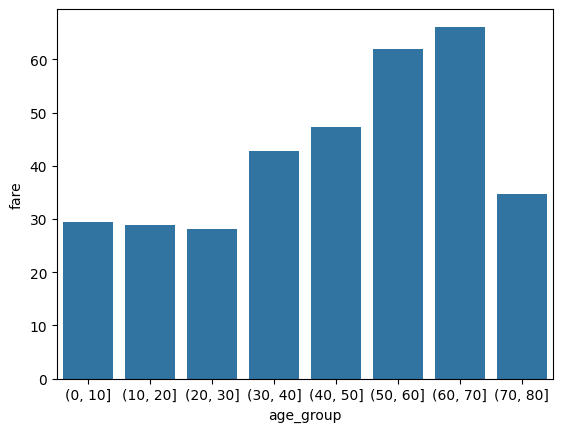

In [6]:
sns.barplot(x='age_group',y='fare', data=grouped)
plt.show()

In [7]:
grouped['new_group'] = grouped['age_group'].astype(str)
grouped

,age_group,fare,new_group
0,"(0, 10]",29.436044,"(0, 10]"
1,"(10, 20]",28.807050,"(10, 20]"
2,"(20, 30]",28.159013,"(20, 30]"
3,"(30, 40]",42.701507,"(30, 40]"
4,"(40, 50]",47.254231,"(40, 50]"
5,"(50, 60]",61.943347,"(50, 60]"
6,"(60, 70]",66.131250,"(60, 70]"
7,"(70, 80]",34.755567,"(70, 80]"


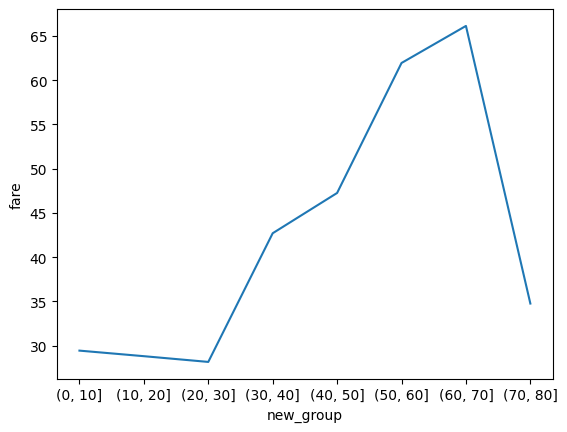

In [8]:
sns.lineplot(x='new_group',y='fare',data=grouped)
plt.show()

In [9]:
grouped_pclass = df.groupby('pclass')['fare'].mean().reset_index()
grouped_pclass

,pclass,fare
0,1,92.229358
1,2,21.855044
2,3,12.879299


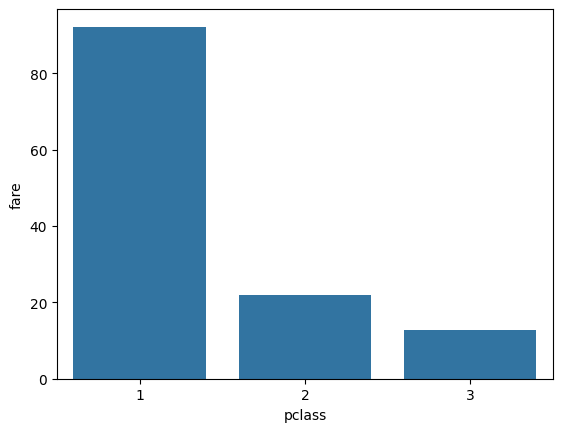

In [10]:
sns.barplot(x='pclass',y='fare',data=grouped_pclass)
plt.show()

<Axes: xlabel='sex', ylabel='survived'>

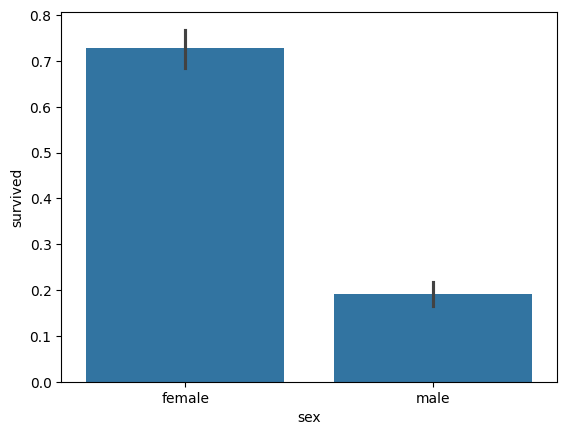

In [11]:
sns.barplot(x='sex',y='survived',data=df1)

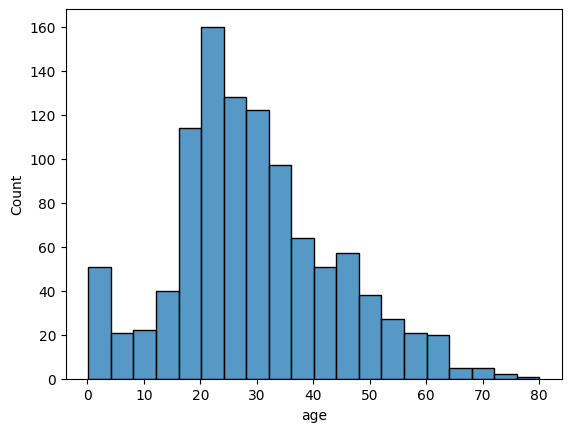

In [12]:
sns.histplot(x='age',bins=20,data=df1)
plt.show()

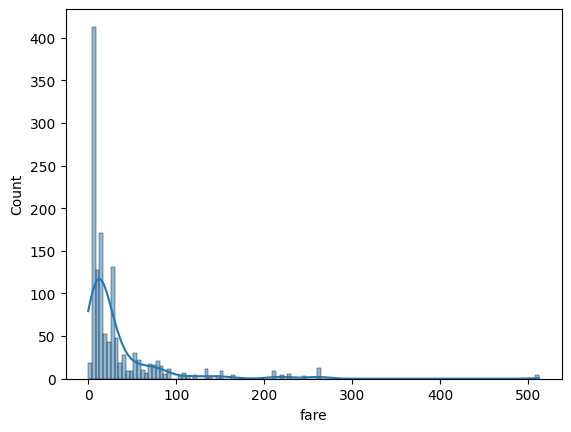

In [13]:
sns.histplot(x='fare',data=df1,kde=True)
plt.show()

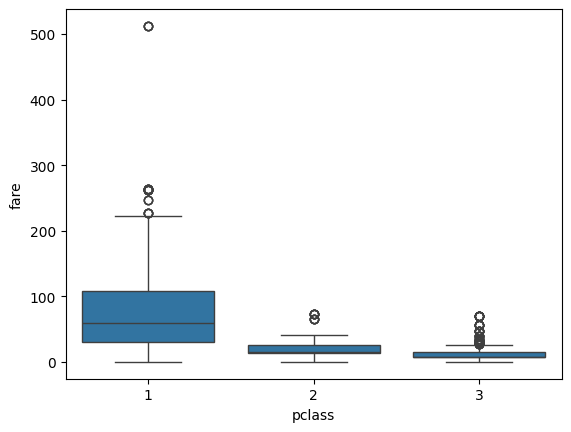

In [14]:
sns.boxplot(x='pclass',y='fare',data=df1)  #outlier very near to line is the extreme value
plt.show()

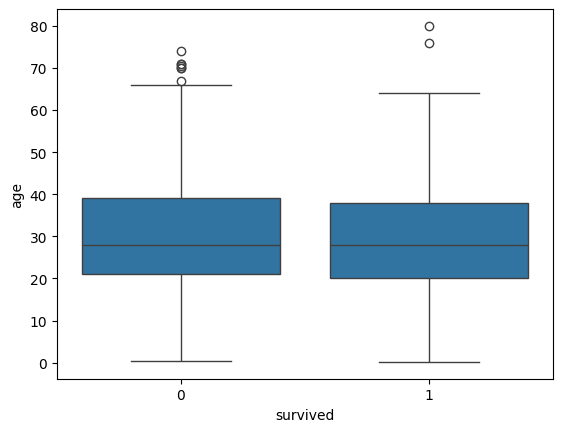

In [15]:
sns.boxplot(x='survived',y='age',data=df1)  #outlier that is very near to line is the extreme value
plt.show()

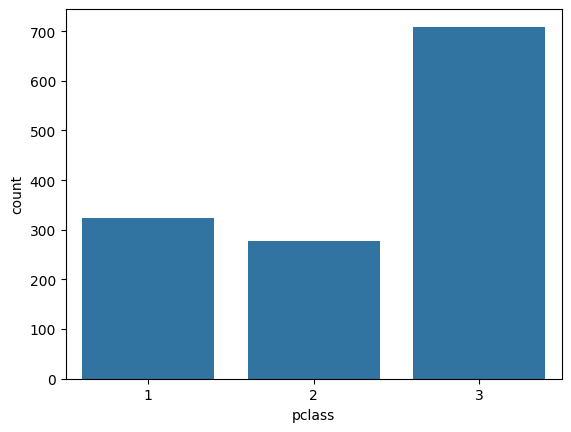

In [16]:
sns.countplot(x='pclass',data=df1)
plt.show()

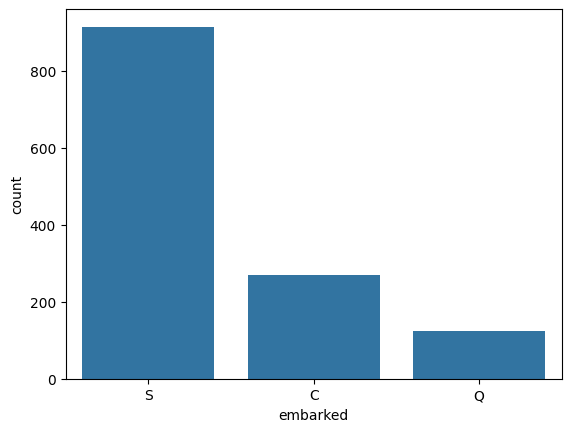

In [17]:
sns.countplot(x='embarked',data=df1)
plt.show()

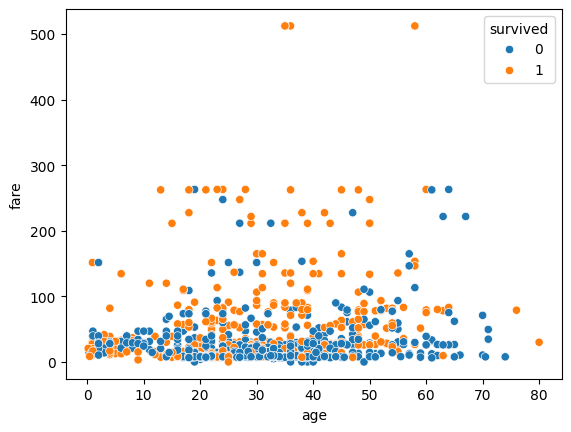

In [18]:
sns.scatterplot(x='age',y='fare',hue='survived',data=df1)
plt.show()

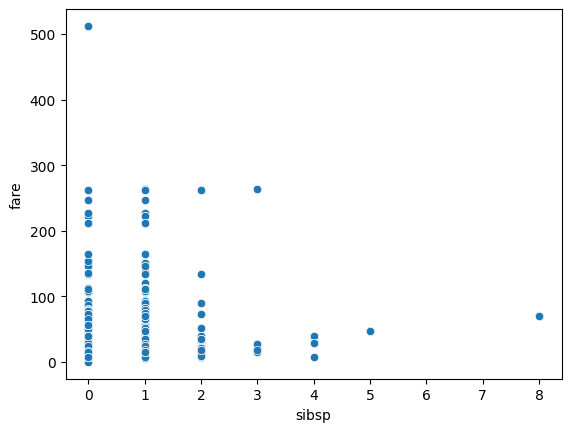

In [19]:
sns.scatterplot(x='sibsp',y='fare',data=df1)
plt.show()